In [27]:
#Link of dataset : https://www.kaggle.com/chrisbow/2018-calorie-exercise-and-weight-changes/version/1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [51]:
diet_df = pd.read_csv('diet_data.csv')

In [52]:
diet_df.head()

Date  Stone  Pounds  Ounces  weight_oz  calories cals_per_oz  \
0  7/30/2018   12.0     2.0     6.0     2726.0    1950.0        0.72   
1  7/31/2018   12.0     0.0     8.0     2696.0    2600.0        0.96   
2   8/1/2018   12.0     1.0     0.0     2704.0    2500.0        0.92   
3   8/2/2018   12.0     1.0     0.0     2704.0    1850.0        0.68   
4   8/3/2018   11.0    12.0     8.0     2664.0    2900.0        1.09   

   five_donuts  walk  run  wine  prot  weight  change  
0          1.0   1.0  0.0   0.0   0.0     0.0   -30.0  
1          1.0   0.0  0.0   0.0   0.0     0.0     8.0  
2          1.0   1.0  0.0   0.0   0.0     0.0     0.0  
3          1.0   1.0  0.0   1.0   0.0     0.0   -40.0  
4          1.0   1.0  0.0   0.0   0.0     0.0    14.0

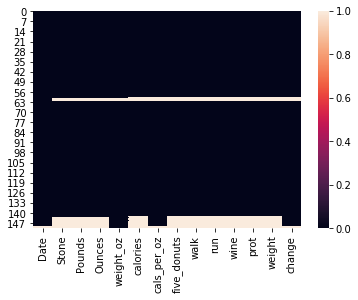

In [53]:
sns.heatmap(diet_df.isnull())

In [54]:
diet_df.isnull().sum()

Date            1
Stone           9
Pounds          9
Ounces          9
weight_oz       2
calories       11
cals_per_oz     4
five_donuts    11
walk           11
run            11
wine           11
prot           11
weight         11
change          4
dtype: int64

In [55]:
diet_df.shape

(151, 14)

In [56]:
diet_df.dropna(inplace=True)

In [57]:
diet_df.shape

(140, 14)

In [58]:
diet_df

Date  Stone  Pounds  Ounces  weight_oz  calories cals_per_oz  \
0     7/30/2018   12.0     2.0     6.0     2726.0    1950.0        0.72   
1     7/31/2018   12.0     0.0     8.0     2696.0    2600.0        0.96   
2      8/1/2018   12.0     1.0     0.0     2704.0    2500.0        0.92   
3      8/2/2018   12.0     1.0     0.0     2704.0    1850.0        0.68   
4      8/3/2018   11.0    12.0     8.0     2664.0    2900.0        1.09   
5      8/4/2018   11.0    13.0     6.0     2678.0    3600.0        1.34   
6      8/5/2018   12.0     0.0     4.0     2692.0    2400.0        0.89   
7      8/6/2018   12.0     0.0     2.0     2690.0    3100.0        1.15   
8      8/7/2018   12.0     0.0     8.0     2696.0    2200.0        0.82   
9      8/8/2018   12.0     0.0     0.0     2688.0    1800.0        0.67   
10     8/9/2018   11.0    11.0     8.0     2648.0    2300.0        0.87   
11    8/10/2018   11.0    10.0     6.0     2630.0    3000.0        1.14   
12    8/11/2018   11.0    11.0     2.0     2642.0    4000.0        1.51   
13    8/12/2018   11.0    13.0     4.0     2676.0    2800.0        1.05   
14    8/13/2018   11.0    12.0     8.0     2664.0    2300.0        0.86   
15    8/14/2018   11.0    12.0     6.0     2662.0    2400.0        0.90   
16    8/15/2018   11.0    12.0     2.0     2658.0    2100.0        0.79   
17    8/16/2018   11.0    11.0     8.0     2648.0    2450.0        0.93   
18    8/17/2018   11.0    12.0     2.0     2658.0    3400.0        1.28   
19    8/18/2018   11.0    13.0     8.0     2680.0    3600.0        1.34   
20    8/19/2018   12.0     0.0     6.0     2694.0    4200.0        1.56   
21    8/20/2018   12.0     1.0     6.0     2710.0    2000.0        0.74   
22    8/21/2018   12.0     0.0     4.0     2692.0    2150.0        0.80   
23    8/22/2018   11.0    13.0     0.0     2672.0    2300.0        0.86   
24    8/23/2018   11.0    11.0     6.0     2646.0    2800.0        1.06   
25    8/24/2018   11.0    11.0     8.0     2648.0    2000.0        0.76   
26    8/25/2018   11.0    11.0     2.0     2642.0    4150.0        1.57   
27    8/26/2018   11.0    12.0     4.0     2660.0    5400.0        2.03   
28    8/27/2018   12.0     1.0     2.0     2706.0    1700.0        0.63   
29    8/28/2018   11.0    13.0     2.0     2674.0    2100.0        0.79   
..          ...    ...     ...     ...        ...       ...         ...   
113  11/20/2018   12.0     0.0     8.0     2696.0    2350.0        0.87   
114  11/21/2018   12.0     2.0     2.0     2722.0    5350.0        1.97   
115  11/22/2018   12.0     3.0     0.0     2736.0    1600.0        0.58   
116  11/23/2018   12.0     0.0     2.0     2690.0    3150.0        1.17   
117  11/24/2018   11.0    13.0     8.0     2680.0    3750.0        1.40   
118  11/25/2018   12.0     1.0     2.0     2706.0    6400.0        2.37   
119  11/26/2018   12.0     2.0     6.0     2726.0    2000.0        0.73   
120  11/27/2018   12.0     1.0     2.0     2706.0    2200.0        0.81   
121  11/28/2018   12.0     0.0     0.0     2688.0    2350.0        0.87   
122  11/29/2018   11.0    13.0     8.0     2680.0    2050.0        0.76   
123  11/30/2018   11.0    13.0     0.0     2672.0    3150.0        1.18   
124   12/1/2018   12.0     0.0     2.0     2690.0    4700.0        1.75   
125   12/2/2018   12.0     1.0     6.0     2710.0    4100.0        1.51   
126   12/3/2018   12.0     2.0     4.0     2724.0    2500.0        0.92   
127   12/4/2018   12.0     0.0     2.0     2690.0    2400.0        0.89   
128   12/5/2018   11.0    13.0     0.0     2672.0    2150.0        0.80   
129   12/6/2018   11.0    12.0     2.0     2658.0    2300.0        0.87   
130   12/7/2018   11.0    11.0     0.0     2640.0    2800.0        1.06   
131   12/8/2018   11.0    12.0     0.0     2656.0    9150.0        3.45   
132   12/9/2018   12.0     4.0     6.0     2758.0    1400.0        0.51   
133  12/10/2018   12.0     2.0     0.0     2720.0    2200.0        0.81   
134  12/11/2018   11.0    13.0     4

In [59]:
diet_df['Date'] = pd.to_datetime(diet_df['Date'])

In [69]:
diet_df.Date.dt.month.isin([10,11,12])

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
113     True
114     True
115     True
116     True
117     True
118     True
119     True
120     True
121     True
122     True
123     True
124     True
125     True
126     True
127     True
128     True
129     True
130     True
131     True
132     True
133     True
134     True
135     True
136     True
137     True
138     True
139     True
140     True
141     True
142     True
Name: Date, Length: 140, dtype: bool

Text(0.5,1,'Changes in weight overtime')

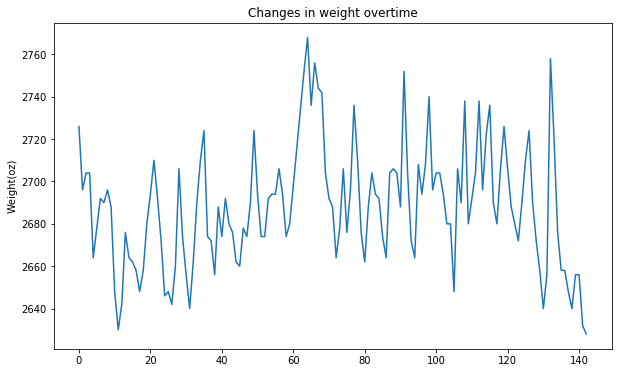

In [74]:
#Weight change overtime
plt.figure(figsize=(10,6))
plt.plot(diet_df['weight_oz'])
plt.ylabel('Weight(oz)')
plt.title('Changes in weight overtime')

Text(0.5,0,'Month')

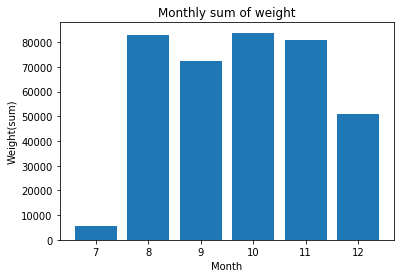

In [95]:
monthly_weight = diet_df.groupby(diet_df.Date.dt.month).weight_oz.sum()
plt.bar(monthly_weight.index,monthly_weight.values)
plt.title('Monthly sum of weight')
plt.ylabel('Weight(sum)')
plt.xlabel('Month')

Text(0.5,1,'Weight v/s Calories')

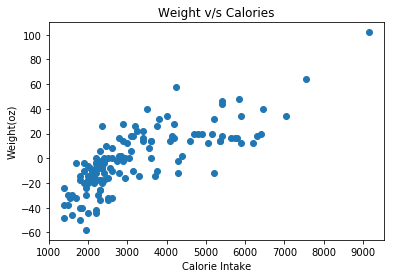

In [35]:
#Change in weight due to calorie intake on daily basis
plt.scatter(x='calories',y='change',data=diet_df)
plt.xlabel('Calorie Intake')
plt.ylabel('Weight Change')
plt.title('Weight v/s Calories')

In [96]:
diet_df.drop(['Date'],axis=1,inplace=True)
diet_df

Stone  Pounds  Ounces  weight_oz  calories cals_per_oz  five_donuts  \
0     12.0     2.0     6.0     2726.0    1950.0        0.72          1.0   
1     12.0     0.0     8.0     2696.0    2600.0        0.96          1.0   
2     12.0     1.0     0.0     2704.0    2500.0        0.92          1.0   
3     12.0     1.0     0.0     2704.0    1850.0        0.68          1.0   
4     11.0    12.0     8.0     2664.0    2900.0        1.09          1.0   
5     11.0    13.0     6.0     2678.0    3600.0        1.34          0.0   
6     12.0     0.0     4.0     2692.0    2400.0        0.89          0.0   
7     12.0     0.0     2.0     2690.0    3100.0        1.15          1.0   
8     12.0     0.0     8.0     2696.0    2200.0        0.82          1.0   
9     12.0     0.0     0.0     2688.0    1800.0        0.67          1.0   
10    11.0    11.0     8.0     2648.0    2300.0        0.87          1.0   
11    11.0    10.0     6.0     2630.0    3000.0        1.14          1.0   
12    11.0    11.0     2.0     2642.0    4000.0        1.51          0.0   
13    11.0    13.0     4.0     2676.0    2800.0        1.05          0.0   
14    11.0    12.0     8.0     2664.0    2300.0        0.86          1.0   
15    11.0    12.0     6.0     2662.0    2400.0        0.90          1.0   
16    11.0    12.0     2.0     2658.0    2100.0        0.79          1.0   
17    11.0    11.0     8.0     2648.0    2450.0        0.93          1.0   
18    11.0    12.0     2.0     2658.0    3400.0        1.28          1.0   
19    11.0    13.0     8.0     2680.0    3600.0        1.34          0.0   
20    12.0     0.0     6.0     2694.0    4200.0        1.56          0.0   
21    12.0     1.0     6.0     2710.0    2000.0        0.74          0.0   
22    12.0     0.0     4.0     2692.0    2150.0        0.80          0.0   
23    11.0    13.0     0.0     2672.0    2300.0        0.86          1.0   
24    11.0    11.0     6.0     2646.0    2800.0        1.06          1.0   
25    11.0    11.0     8.0     2648.0    2000.0        0.76          1.0   
26    11.0    11.0     2.0     2642.0    4150.0        1.57          0.0   
27    11.0    12.0     4.0     2660.0    5400.0        2.03          0.0   
28    12.0     1.0     2.0     2706.0    1700.0        0.63          1.0   
29    11.0    13.0     2.0     2674.0    2100.0        0.79          1.0   
..     ...     ...     ...        ...       ...         ...          ...   
113   12.0     0.0     8.0     2696.0    2350.0        0.87          0.0   
114   12.0     2.0     2.0     2722.0    5350.0        1.97          1.0   
115   12.0     3.0     0.0     2736.0    1600.0        0.58          1.0   
116   12.0     0.0     2.0     2690.0    3150.0        1.17          1.0   
117   11.0    13.0     8.0     2680.0    3750.0        1.40          0.0   
118   12.0     1.0     2.0     2706.0    6400.0        2.37          0.0   
119   12.0     2.0     6.0     2726.0    2000.0        0.73          1.0   
120   12.0     1.0     2.0     2706.0    2200.0        0.81          1.0   
121   12.0     0.0     0.0     2688.0    2350.0        0.87          1.0   
122   11.0    13.0     8.0     2680.0    2050.0        0.76          1.0   
123   11.0    13.0     0.0     2672.0    3150.0        1.18          0.0   
124   12.0     0.0     2.0     2690.0    4700.0        1.75          0.0   
125   12.0     1.0     6.0     2710.0    4100.0        1.51          0.0   
126   12.0     2.0     4.0     2724.0    2500.0        0.92          1.0   
127   12.0     0.0     2.0     2690.0    2400.0        0.89          1.0   
128   11.0    13.0     0.0     2672.0    2150.0        0.80          1.0   
129   11.0    12.0     2.0     2658.0    2300.0        0.87          0.0   
130   11.0    11.0     0.0     2640.0    2800.0        1.06          0.0   
131   11.0    12.0     0.0     2656.0    9150.0        3.45          0.0   
132   12.0     4.0     6.0     2758.0    1400.0        0.51          0.0   
133   12.0     2.0     0.0     2720.0    2200.0      

In [98]:
X= diet_df.iloc[:,:-1].values
y=diet_df.iloc[:,-1].values
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.15,random_state=0)
scaler = StandardScaler().fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
lr = LinearRegression()
lr.fit(X_train,y_train)
#predict the test set results
y_pred = lr.predict(X_test)

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse_lin_reg = rmse
rmse_lin_reg

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


13.962318949100085